In [93]:
#!pip install folium --quiet

In [94]:
import pandas as pd
from pymongo import MongoClient

%matplotlib inline

mongo_client = MongoClient('34.215.106.7', 27016)
database_reference = mongo_client.twitter

| | | | | |
|-|-|-|-|-|
| `_id`        | `truncated`                 |`user`            |`extended_tweet` | `favorited`                   |
| `created_at` | `in_reply_to_status_id`     |`geo`             |`quote_count`    | `retweeted`                   |
| `id`         | `in_reply_to_status_id_str` |`coordinates`     |`reply_count`    | `filter_level`                |
| `id_str`     | `in_reply_to_user_id`       |`place`           |`retweet_count`  | `lang`                        |
| `text`       | `in_reply_to_user_id_str`   |`contributors`    |`favorite_count` | `timestamp_ms`                |
| `source`     | `in_reply_to_screen_name`   |`is_quote_status` |`entities`       |                               |
























![](https://www.evernote.com/l/AAEO7gpKcKdI5YJeGrni4GhdlBiBWdTa3YgB/image.png)

In [95]:
collection_reference = database_reference.instructor_test_group

In [96]:
collection_reference.count()

20000

In [97]:
cursor_sampl = collection_reference.aggregate([{'$sample':{'size':20}}])
cursor_sampl.next()

{'_id': ObjectId('5a63937236dd5f00016305d9'),
 'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Jan 20 19:07:30 +0000 2018',
 'display_text_range': [17, 17],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/cnsyFop7h1',
    'expanded_url': 'https://twitter.com/Frank_K_Santoyo/status/954792517815291904/photo/1',
    'id': 954792510680788992,
    'id_str': '954792510680788992',
    'indices': [18, 41],
    'media_url': 'http://pbs.twimg.com/tweet_video_thumb/DUAautFU8AAIdvs.jpg',
    'media_url_https': 'https://pbs.twimg.com/tweet_video_thumb/DUAautFU8AAIdvs.jpg',
    'sizes': {'large': {'h': 240, 'resize': 'fit', 'w': 320},
     'medium': {'h': 240, 'resize': 'fit', 'w': 320},
     'small': {'h': 240, 'resize': 'fit', 'w': 320},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/cnsyFop7h1'}],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 25073877,
    'id_str': '25073877',
    'indice

In [98]:
cursor_sampl.next()

{'_id': ObjectId('5a76a42715ba4c0001551cd8'),
 'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Feb 04 06:11:51 +0000 2018',
 'display_text_range': [26, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/i/web/status/9…',
    'expanded_url': 'https://twitter.com/i/web/status/960033136724795392',
    'indices': [117, 140],
    'url': 'https://t.co/xjx2B4kFYa'}],
  'user_mentions': [{'id': 491046083,
    'id_str': '491046083',
    'indices': [0, 9],
    'name': 'King Of The Biscuits',
    'screen_name': 'WEYaeger'},
   {'id': 2467791,
    'id_str': '2467791',
    'indices': [10, 25],
    'name': 'Washington Post',
    'screen_name': 'washingtonpost'}]},
 'extended_tweet': {'display_text_range': [26, 250],
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 491046083,
     'id_str': '491046083',
     'indices': [0, 9],
     'name': 'King Of The Biscuits',
     'screen_name': 'WEYaeger'},
    {

## Tweets By Day

In [122]:
date_from_string = {"$dateFromString" : { "dateString" : "$created_at"}}

date_to_id = {
    "$project": {
        "_id" : 0,
        "verified" : {'$user.verified' : True}
    }
}

group_by_date = {
    "$group" : {
        "tweets" : {"$sum" : 1},
        "_id" : {
            "year" : "$year",
            "month" : "$month",
            "day" : "$day"
        },
    }
}




In [136]:
cursor1 = collection_reference.aggregate(
  [
    {
      '$match': {
        'user.verified': True
      }
    },

    {
      '$group' : {
        "tweets" : {"$count" : 1},
        "_id" : {
            "year" : "$year",
            "month" : "$month",
            "day" : "$day"
                },
        }
    }
    
  ]
)
cursor1.next()

OperationFailure: unknown group operator '$count'

In [7]:
def dictionary_to_datestring(x):
    month = x['month']
    day = x['day']
    year = x['year']
    return "{}-{}-{}".format(month, day, year)

In [124]:
daily_tweets = pd.DataFrame(list(cursor))
daily_tweets.sample(5)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
datestrings = daily_tweets['_id'].apply(dictionary_to_datestring)
daily_tweets['date'] = pd.to_datetime(datestrings)

daily_tweets.drop('_id', axis=1, inplace=True)
daily_tweets.sort_values('date', inplace=True)
daily_tweets.set_index('date', inplace=True)
daily_tweets.plot()

## Tweet Locations

In [89]:

just_geo = {'source' : 1}

#cursor = collection_reference.find(nonnull_geo, just_geo)
cursor= collection_reference.find({'source' : {'$regex': '.*iPhone.*'}})


In [90]:
cursor.count()

17599

In [57]:

geo_tweets = pd.DataFrame(list(cursor))
geo_tweets.keys()


Index(['_id', 'geo', 'user'], dtype='object')

In [ ]:
def parse_geo_from_tweets(tweets):
    geo = pd.DataFrame(list(tweets.values))
    return geo
geo= parse_geo_from_tweets(geo_tweets)
geo1 = geo[:5][2]
geo2 = pd.DataFrame(list(geo1.values))
geo2.iloc[:,:10]
#geo2 = pd.DataFrame(list(geo1.keys() 

In [23]:
geo2['id']

0     15040449
1     29393121
2     23235188
3    398433202
4     23774938
Name: id, dtype: int64

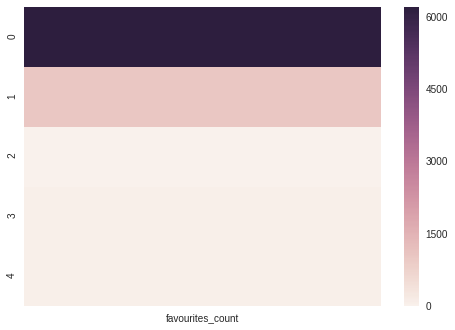

In [48]:
 import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
ax = sns.heatmap(geo2.iloc[:,5:6])

In [ ]:
cursor.count()

In [ ]:
geo_tweets = pd.DataFrame(list(cursor))
geo_tweets.keys()

In [ ]:
def parse_geo_from_tweets(tweets):
    geo = pd.DataFrame(list(tweets.values))
    return geo

In [ ]:
geo= parse_geo_from_tweets(geo_tweets)
geo1 = geo[:5]
geo1[2][1]['friends_count']



In [ ]:
geo1[2][1]['id']


In [ ]:
i=1
geo1[1][i]

In [ ]:
import folium
starting_loc = [34.0689, -118.4452]
la_map = folium.Map(location=starting_loc, zoom_start=13)

In [ ]:
for i in range(len(geo)):
    popup = folium.Popup(geo[2][i], parse_html=True)
    folium.Marker(geo[1][i]['coordinates'],popup=popup,icon=folium.Icon(icon='cloud')).add_to(la_map)

In [ ]:
la_map

In [ ]:
for i in range(len(geo1)):
    popup = folium.Popup(geo1[2][i], parse_html=True)
    marker = folium.Marker(geo1[1][i]['coordinates'],popup=popup,icon=folium.Icon(icon='cloud')).add_to(la_map)